In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [2]:
head = "/home/dhoogla/PhD/clean-ids-collection"
cic_data = {    
    "cicddos2019-DNS": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_DNS.parquet',
    "cicddos2019-LDAP1": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_LDAP.parquet',
    "cicddos2019-MSSQL1": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_MSSQL.parquet',
    "cicddos2019-NETBIOS1": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_NetBIOS.parquet',
    "cicddos2019-NTP": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_NTP.parquet',
    "cicddos2019-SNMP": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_SNMP.parquet',
    "cicddos2019-SSDP": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_SSDP.parquet',
    "cicddos2019-UDP1": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_DrDoS_UDP.parquet',
    "cicddos2019-SYN1": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_Syn.parquet',
    "cicddos2019-TFTP": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_TFTP.parquet',
    "cicddos2019-UDPLAG1": f'{head}/cic-ddos2019/dirty-with-metadata/01_12_UDPLag.parquet',
    "cicddos2019-LDAP2": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_LDAP.parquet',
    "cicddos2019-MSSQL2": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_MSSQL.parquet',
    "cicddos2019-NETBIOS2": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_NetBIOS.parquet',
    "cicddos2019-PORTMAP": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_Portmap.parquet',
    "cicddos2019-SYN2": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_Syn.parquet',
    "cicddos2019-UDPLAG2": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_UDPLag.parquet',
    "cicddos2019-UDP2": f'{head}/cic-ddos2019/dirty-with-metadata/03_11_UDP.parquet',
    "cicddos2019": f'{head}/cic-ddos2019/dirty-with-metadata/cicddos2019.parquet',

    "cicdos2017": f'{head}/cic-dos2017/dirty-with-metadata/cicdos2017.parquet',

    "cicids2017-benign": f'{head}/cic-ids2017/dirty-with-metadata/Benign-Monday-WorkingHours.pcap_ISCX.parquet',
    "cicids2017-botnet": f'{head}/cic-ids2017/dirty-with-metadata/Botnet-Friday-WorkingHours-Morning.pcap_ISCX.parquet',
    "cicids2017-bruteforce": f'{head}/cic-ids2017/dirty-with-metadata/Bruteforce-Tuesday-WorkingHours.pcap_ISCX.parquet',    
    "cicids2017-ddos": f'{head}/cic-ids2017/dirty-with-metadata/DDoS-Friday-WorkingHours-Afternoon.pcap_ISCX.parquet',
    "cicids2017-dos": f'{head}/cic-ids2017/dirty-with-metadata/DoS-Wednesday-WorkingHours.pcap_ISCX.parquet',
    "cicids2017-infiltration": f'{head}/cic-ids2017/dirty-with-metadata/Infiltration-Thursday-WorkingHours-Afternoon.pcap_ISCX.parquet',
    "cicids2017-portscan": f'{head}/cic-ids2017/dirty-with-metadata/Portscan-Friday-WorkingHours-Afternoon.pcap_ISCX.parquet',
    "cicids2017-webattacks": f'{head}/cic-ids2017/dirty-with-metadata/WebAttacks-Thursday-WorkingHours-Morning.pcap_ISCX.parquet',
    "cicids2017": f'{head}/cic-ids2017/dirty-with-metadata/cicids2017.parquet',

    "csecicids2018-botnet": f'{head}/cse-cic-ids2018/dirty-with-metadata/Botnet-Friday-02-03-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-bruteforce": f'{head}/cse-cic-ids2018/dirty-with-metadata/Bruteforce-Wednesday-14-02-2018_TrafficForML_CICFlowMeter.parquet',    
    "csecicids2018-ddos1": f'{head}/cse-cic-ids2018/dirty-with-metadata/DDoS1-Tuesday-20-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-ddos2": f'{head}/cse-cic-ids2018/dirty-with-metadata/DDoS2-Wednesday-21-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-dos1": f'{head}/cse-cic-ids2018/dirty-with-metadata/Dos1-Thursday-15-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-dos2": f'{head}/cse-cic-ids2018/dirty-with-metadata/DoS2-Friday-16-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-infiltration1": f'{head}/cse-cic-ids2018/dirty-with-metadata/Infil1-Wednesday-28-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-infiltration2": f'{head}/cse-cic-ids2018/dirty-with-metadata/Infil2-Thursday-01-03-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-webattacks1": f'{head}/cse-cic-ids2018/dirty-with-metadata/Web1-Thursday-22-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018-webattacks2": f'{head}/cse-cic-ids2018/dirty-with-metadata/Web2-Friday-23-02-2018_TrafficForML_CICFlowMeter.parquet',
    "csecicids2018": f'{head}/cse-cic-ids2018/dirty-with-metadata/csecicids2018.parquet',
}

In [3]:
dataset = "cicddos2019"
datapaths = [f"{cic_data[dataset]}"]

In [4]:
df = pd.concat(objs=[pd.read_parquet(path) for path in datapaths], ignore_index=True, copy=False, sort=False, verify_integrity=False)

In [5]:
df.columns

Index(['Source IP', 'Source Port', 'Destination IP', 'Destination Port',
       'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
     

In [6]:
df = df[['Destination Port', 'Label']]
df['Label'] = df['Label'].astype(dtype='object')
df['Label'].value_counts()

Benign           107111
Syn               36932
TFTP              24527
DrDoS_NTP         14286
LDAP               4546
Portmap            4487
UDP                3666
UDP-lag            3313
DrDoS_DNS          3301
MSSQL              2727
DrDoS_UDP          2123
DrDoS_MSSQL        1956
NetBIOS            1725
DrDoS_NetBIOS      1660
DrDoS_LDAP         1577
DrDoS_SNMP         1504
DrDoS_SSDP          751
UDPLag               12
WebDDoS               2
Name: Label, dtype: int64

In [7]:

label_idx = df.columns.size -1
attacks = df.loc[df['Label'] != "Benign"].index
df.iloc[attacks, label_idx] = 1.0
df.iloc[df.index.difference(attacks), label_idx] = 0.0
df['Label'] = df['Label'].astype(dtype='float32', copy=False)
df['Label'].value_counts()

1.0    109095
0.0    107111
Name: Label, dtype: int64

In [8]:
col = df.columns[-1]
cols = df.columns[:-1]
vc = df[col].value_counts()
n = vc.iloc[-1]
m = vc.iloc[0]
initial_cut = df.loc[df[col] == vc.index[0]].sample(n=int(m-n), replace=False)
df = df.drop(index=initial_cut.index)

In [9]:
print(df.shape)
df['Label'].value_counts()

(214222, 2)


0.0    107111
1.0    107111
Name: Label, dtype: int64

In [10]:
gp = df.groupby('Label')
with pd.option_context('display.max_rows', 50):
    print(gp.get_group(0.0)['Destination Port'].value_counts())
    print(gp.get_group(1.0)['Destination Port'].value_counts())

53       35689
443      34067
80       14528
0         1626
465        508
         ...  
61820        1
61831        1
61793        1
57405        1
61633        1
Name: Destination Port, Length: 10816, dtype: int64
22       27
80       26
7682     10
53830     9
39966     9
         ..
40393     1
57242     1
45989     1
37999     1
24064     1
Name: Destination Port, Length: 51494, dtype: int64


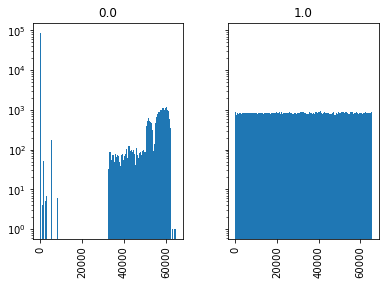

In [25]:
hist = df.hist(column='Destination Port', by='Label', bins=256, log=True, sharey=True)

In [16]:
model = RF()
best_param_dict = {
        'bootstrap': True,
        'max_depth': 3,
        'max_features': 'sqrt',
        'min_impurity_decrease': 0.0,
        'min_samples_leaf': 2,
        'n_estimators': 10,
        'max_samples': 0.5,
        'criterion': 'entropy',
        'n_jobs': -1,
        }
model.set_params(**best_param_dict)

RandomForestClassifier(criterion='entropy', max_depth=3, max_samples=0.5,
                       min_samples_leaf=2, n_estimators=10, n_jobs=-1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['Destination Port'], df['Label'], test_size=0.8, random_state=42)

In [18]:
model.fit(X=X_train.array.reshape(-1,1), y=y_train.array)

RandomForestClassifier(criterion='entropy', max_depth=3, max_samples=0.5,
                       min_samples_leaf=2, n_estimators=10, n_jobs=-1)

In [19]:
intra_outputs = model.predict(X=X_test.array.reshape(-1,1))
intra_acc = accuracy_score(y_true=y_test, y_pred=intra_outputs)
intra_rec = recall_score(y_true=y_test, y_pred=intra_outputs)
intra_pre = precision_score(y_true=y_test, y_pred=intra_outputs)
print(f"{dataset} => Destination Port")
print(f"Accuracy: {intra_acc:.3f}")
print(f"Recall: {intra_rec:.3f}")
print(f"Precision: {intra_pre:.3f}")


cicddos2019 => Destination Port
Accuracy: 0.907
Recall: 0.998
Precision: 0.845
